# Penguins
This notebook is my attempt to analyze penguins dataset.

In [2]:
# Data Frames.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading

In [3]:
#Load the Penguins dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Cleaning dataset

In [7]:
# checking missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# removing missing values
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [63]:
# Checking multiple values
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 333, dtype: bool

In [220]:
# Correcting index
df.reset_index(drop=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Describing dataset

In [221]:
count1=df['species'].value_counts()
count2=df['island'].value_counts()
count3=df['sex'].value_counts()
print(count1,count2,count3)


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64 island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


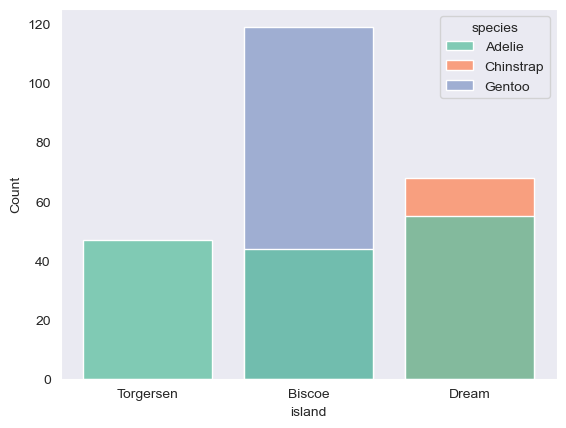

In [222]:
with sns.color_palette("Set2"):
    sns.histplot(df, x='island', hue='species', shrink=0.8, alpha=0.8)

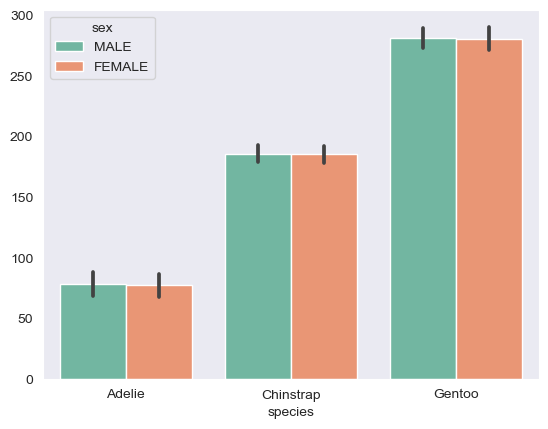

In [227]:
with sns.color_palette("Set2"):
    sns.barplot(df, x='species', y=df.species.index, hue='sex')

c:\Users\Lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


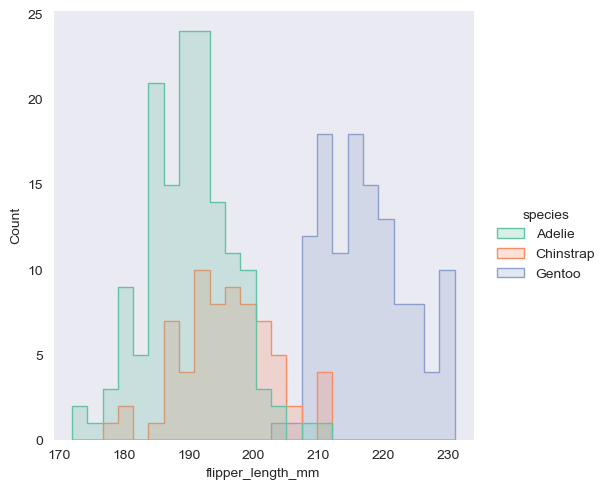

In [224]:
with sns.color_palette("Set2"):
    sns.displot(df, x="flipper_length_mm", hue="species", bins=25, element='step')
    

c:\Users\Lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


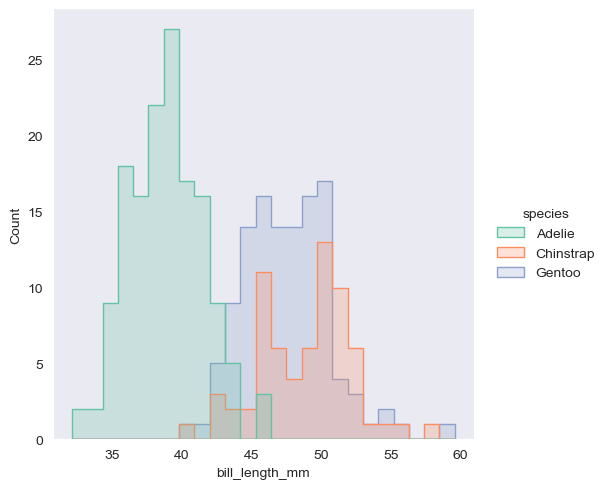

In [225]:
with sns.color_palette('Set2'):
    sns.displot(df, x='bill_length_mm' , hue='species', bins=25, element='step')

In [ ]:
df['bill_depth_mm']

In [10]:
df.cov(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [11]:
corr_coeff=df.corr(numeric_only=True)
print(corr_coeff)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


In [12]:
Adelie_penguin=df[df['species'] == 'Adelie']
Adelie_penguin.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.385813,0.332274,0.544276
bill_depth_mm,0.385813,1.000000,0.310897,0.580156
flipper_length_mm,0.332274,0.310897,1.000000,0.464854
body_mass_g,0.544276,0.580156,0.464854,1.000000


In [13]:
Gentoo_penguin=df[df['species'] == 'Gentoo']
Gentoo_penguin.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.654023,0.664205,0.666730
bill_depth_mm,0.654023,1.000000,0.710642,0.722967
flipper_length_mm,0.664205,0.710642,1.000000,0.711305
body_mass_g,0.666730,0.722967,0.711305,1.000000


In [36]:
Chinstrap_penguin=df[df['species'] == 'Chinstrap']
Chinstrap_penguin.median(numeric_only=True)

bill_length_mm         49.55
bill_depth_mm          18.45
flipper_length_mm     196.00
body_mass_g          3700.00
dtype: float64

***
### End